In [94]:
import pandas as pd

# Load the dataset
file_path = 'data/dataset_gym_membership_group2.csv'
df = pd.read_csv(file_path)


df.columns = df.columns.str.replace(" ", "_")
# Display the first few rows of the dataset
df.head(), df.info(), df.describe(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                20000 non-null  int64 
 1   Age                    20000 non-null  int64 
 2   Gender                 20000 non-null  object
 3   Annual_Income          20000 non-null  int64 
 4   Membership_Type        20000 non-null  object
 5   Membership_Duration    20000 non-null  int64 
 6   Frequency_of_Visit     20000 non-null  int64 
 7   Preferred_Time         20000 non-null  object
 8   Previous_Membership    20000 non-null  object
 9   Marital_Status         20000 non-null  object
 10  Location               20000 non-null  object
 11  Promotion_Response     20000 non-null  object
 12  Health_Condition       20000 non-null  object
 13  Membership_Prediction  20000 non-null  object
 14  Professional           20000 non-null  object
 15  Professional_Status

(   User_ID  Age  Gender  Annual_Income Membership_Type  Membership_Duration  \
 0        1   56    Male          95635             VIP                   41   
 1        2   69   Other          69800         Premium                   24   
 2        3   46  Female          66158         Premium                   20   
 3        4   32    Male          81401         Premium                    6   
 4        5   60  Female          77375         Premium                   25   
 
    Frequency_of_Visit Preferred_Time Previous_Membership Marital_Status  \
 0                   6        Evening                  No        Married   
 1                   4        Evening                 Yes        Married   
 2                   4        Evening                 Yes        Married   
 3                   6        Evening                 Yes        Married   
 4                   5      Afternoon                  No        Married   
 
    Location Promotion_Response Health_Condition Membership_

Gender gaps

In [95]:
df_gender_income=df.groupby('Gender')['Annual_Income'].agg(['mean', 'median','max', 'min','std','var']).reset_index()
print(df_gender_income)

   Gender          mean   median     max   min           std           var
0  Female  56306.116838  58325.0  118253 -3458  23277.493211  5.418417e+08
1    Male  68791.797925  71031.0  139759 -4587  28121.316784  7.908085e+08
2   Other  57657.450299  58445.0  118231   236  22355.441024  4.997657e+08


In [96]:
df_gender_membtype=df.groupby('Gender')[['Membership_Type','Membership_Prediction']].value_counts()
print(df_gender_membtype)

Gender  Membership_Type  Membership_Prediction
Female  Premium          No                       2068
                         Yes                      2008
        Basic            No                       1819
                         Yes                      1804
        VIP              Yes                      1083
                         No                       1035
Male    VIP              Yes                      1786
                         No                       1690
        Basic            Yes                      1529
                         No                       1500
        Premium          No                       1422
                         Yes                      1421
Other   Premium          No                        194
                         Yes                       168
        Basic            Yes                       162
                         No                        132
        VIP              No                         94
                  

In [97]:
df_prev_membtypepred=df.groupby('Previous_Membership')[['Promotion_Response','Membership_Type','Membership_Prediction']].value_counts()
print(df_prev_membtypepred)

Previous_Membership  Promotion_Response  Membership_Type  Membership_Prediction
No                   No                  Premium          No                       1847
                                                          Yes                      1742
                                         VIP              Yes                      1371
                                                          No                       1304
                     Yes                 Basic            Yes                       955
                                                          No                        905
                     No                  Basic            Yes                       844
                                                          No                        824
                     Yes                 VIP              Yes                        69
                                                          No                         62
                                        

In [98]:
df_gender_location=df.groupby('Gender')['Location'].value_counts(normalize=True)
print(df_gender_location)

Gender  Location
Female  Urban       0.410920
        Suburban    0.294897
        Rural       0.294184
Male    Urban       0.393453
        Suburban    0.305413
        Rural       0.301134
Other   Urban       0.421557
        Suburban    0.306587
        Rural       0.271856
Name: proportion, dtype: float64


In [99]:
df_gender_pro=df.groupby('Gender')['Professional'].value_counts(normalize=True)
print(df_gender_pro)

Gender  Professional
Female  Employed        0.479271
        Late Career     0.182031
        Early Career    0.143832
        Student         0.102679
        Retired         0.092187
Male    Employed        0.472828
        Late Career     0.188383
        Early Career    0.153937
        Student         0.092640
        Retired         0.092212
Other   Employed        0.480240
        Late Career     0.191617
        Early Career    0.144910
        Retired         0.101796
        Student         0.081437
Name: proportion, dtype: float64


In [100]:
df_type_promo=df.groupby('Membership_Type')['Promotion_Response'].value_counts(normalize=True)
print(df_type_promo)

Membership_Type  Promotion_Response
Basic            Yes                   0.529081
                 No                    0.470919
Premium          No                    0.982145
                 Yes                   0.017855
VIP              No                    0.950113
                 Yes                   0.049887
Name: proportion, dtype: float64


In [101]:
df_pro_type=df.groupby('Professional')['Membership_Type'].value_counts(normalize=True)
print(df_pro_type)

Professional  Membership_Type
Early Career  Basic              0.597241
              Premium            0.298789
              VIP                0.103970
Employed      Premium            0.479635
              VIP                0.301071
              Basic              0.219295
Late Career   VIP                0.528317
              Premium            0.240831
              Basic              0.230852
Retired       Premium            0.455184
              VIP                0.291577
              Basic              0.253240
Student       Basic              0.904737
              VIP                0.049949
              Premium            0.045314
Name: proportion, dtype: float64


In [102]:
df_pro_income=df.groupby('Professional')['Annual_Income'].agg(['mean', 'median','max', 'min','std','var'])
print(df_pro_income)

                      mean   median     max    min           std           var
Professional                                                                  
Early Career  37365.961978  36245.0   68729  13225  11160.386468  1.245542e+08
Employed      68783.441423  68479.0  118600  27951  17767.185815  3.156729e+08
Late Career   86649.699299  86070.5  139759  27951  19959.720995  3.983905e+08
Retired       64519.660907  64447.5  117929  20152  19693.213758  3.878227e+08
Student       18999.303811  18004.5   49311  -4587  10728.486860  1.151004e+08


In [103]:
df_pro_health=df.groupby('Professional')['Health_Condition'].value_counts(normalize=True)
print(df_pro_health)

Professional  Health_Condition
Early Career  Poor                0.252692
              Excellent           0.251682
              Good                0.248318
              Average             0.247308
Employed      Poor                0.257401
              Excellent           0.250682
              Average             0.247008
              Good                0.244909
Late Career   Average             0.255394
              Good                0.251079
              Poor                0.249730
              Excellent           0.243797
Retired       Excellent           0.258099
              Poor                0.254860
              Good                0.245140
              Average             0.241901
Student       Average             0.253862
              Poor                0.250257
              Good                0.248198
              Excellent           0.247683
Name: proportion, dtype: float64


In [104]:
df_pro_age=df.groupby('Professional')['Age'].agg(['mean', 'median','max', 'min','std','var'])
print(df_pro_age)

                   mean  median  max  min       std        var
Professional                                                  
Early Career  26.563257    27.0   30   23  2.317677   5.371628
Employed      42.784275    43.0   55   31  7.194922  51.766896
Late Career   60.532362    61.0   65   56  2.898755   8.402783
Retired       67.994060    68.0   70   66  1.422011   2.022115
Student       21.830587    20.0   70   18  8.292789  68.770357


In [105]:
df_prof_type=df.groupby('Professional_Status')['Membership_Type'].value_counts(normalize=True)
print(df_prof_type)

Professional_Status  Membership_Type
In Education         Basic              0.904737
                     VIP                0.049949
                     Premium            0.045314
Retired              Premium            0.455184
                     VIP                0.291577
                     Basic              0.253240
Working              Premium            0.391830
                     VIP                0.316920
                     Basic              0.291250
Name: proportion, dtype: float64


In [106]:
df_marital_frq=df.groupby('Marital_Status')['Frequency_of_Visit'].value_counts(normalize=True)
print(df_marital_frq)

Marital_Status  Frequency_of_Visit
Divorced        1                     0.170801
                4                     0.167236
                3                     0.163969
                2                     0.163671
                6                     0.162483
                5                     0.161741
                7                     0.010100
Married         6                     0.167672
                3                     0.166013
                4                     0.165259
                5                     0.165259
                1                     0.164807
                2                     0.162244
                7                     0.008745
Single          2                     0.170761
                1                     0.167596
                6                     0.166843
                3                     0.164883
                4                     0.161718
                5                     0.157046
                7        

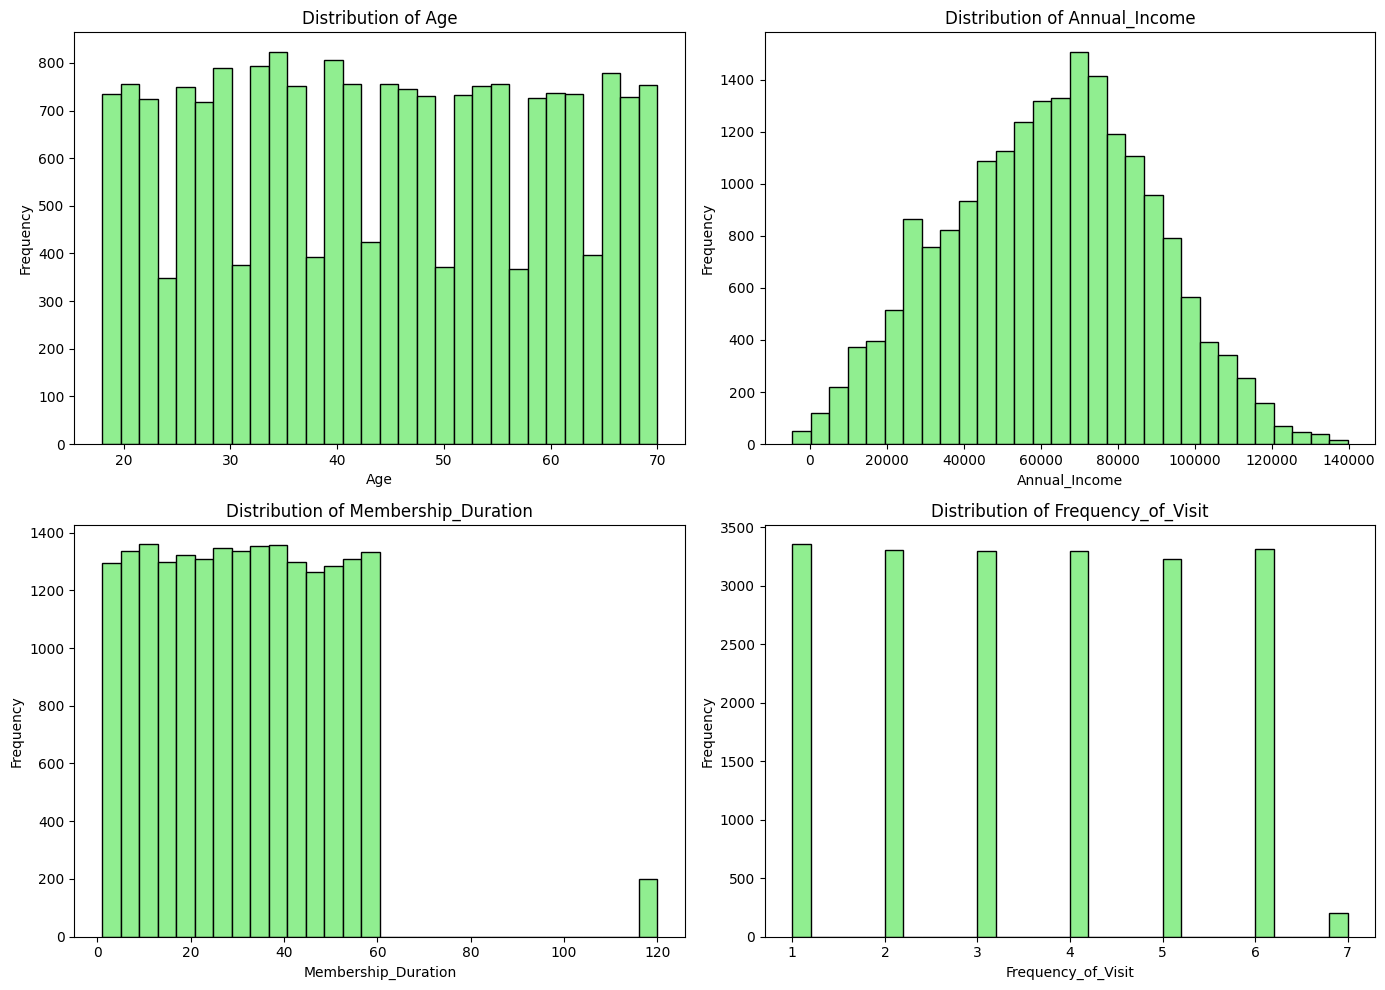

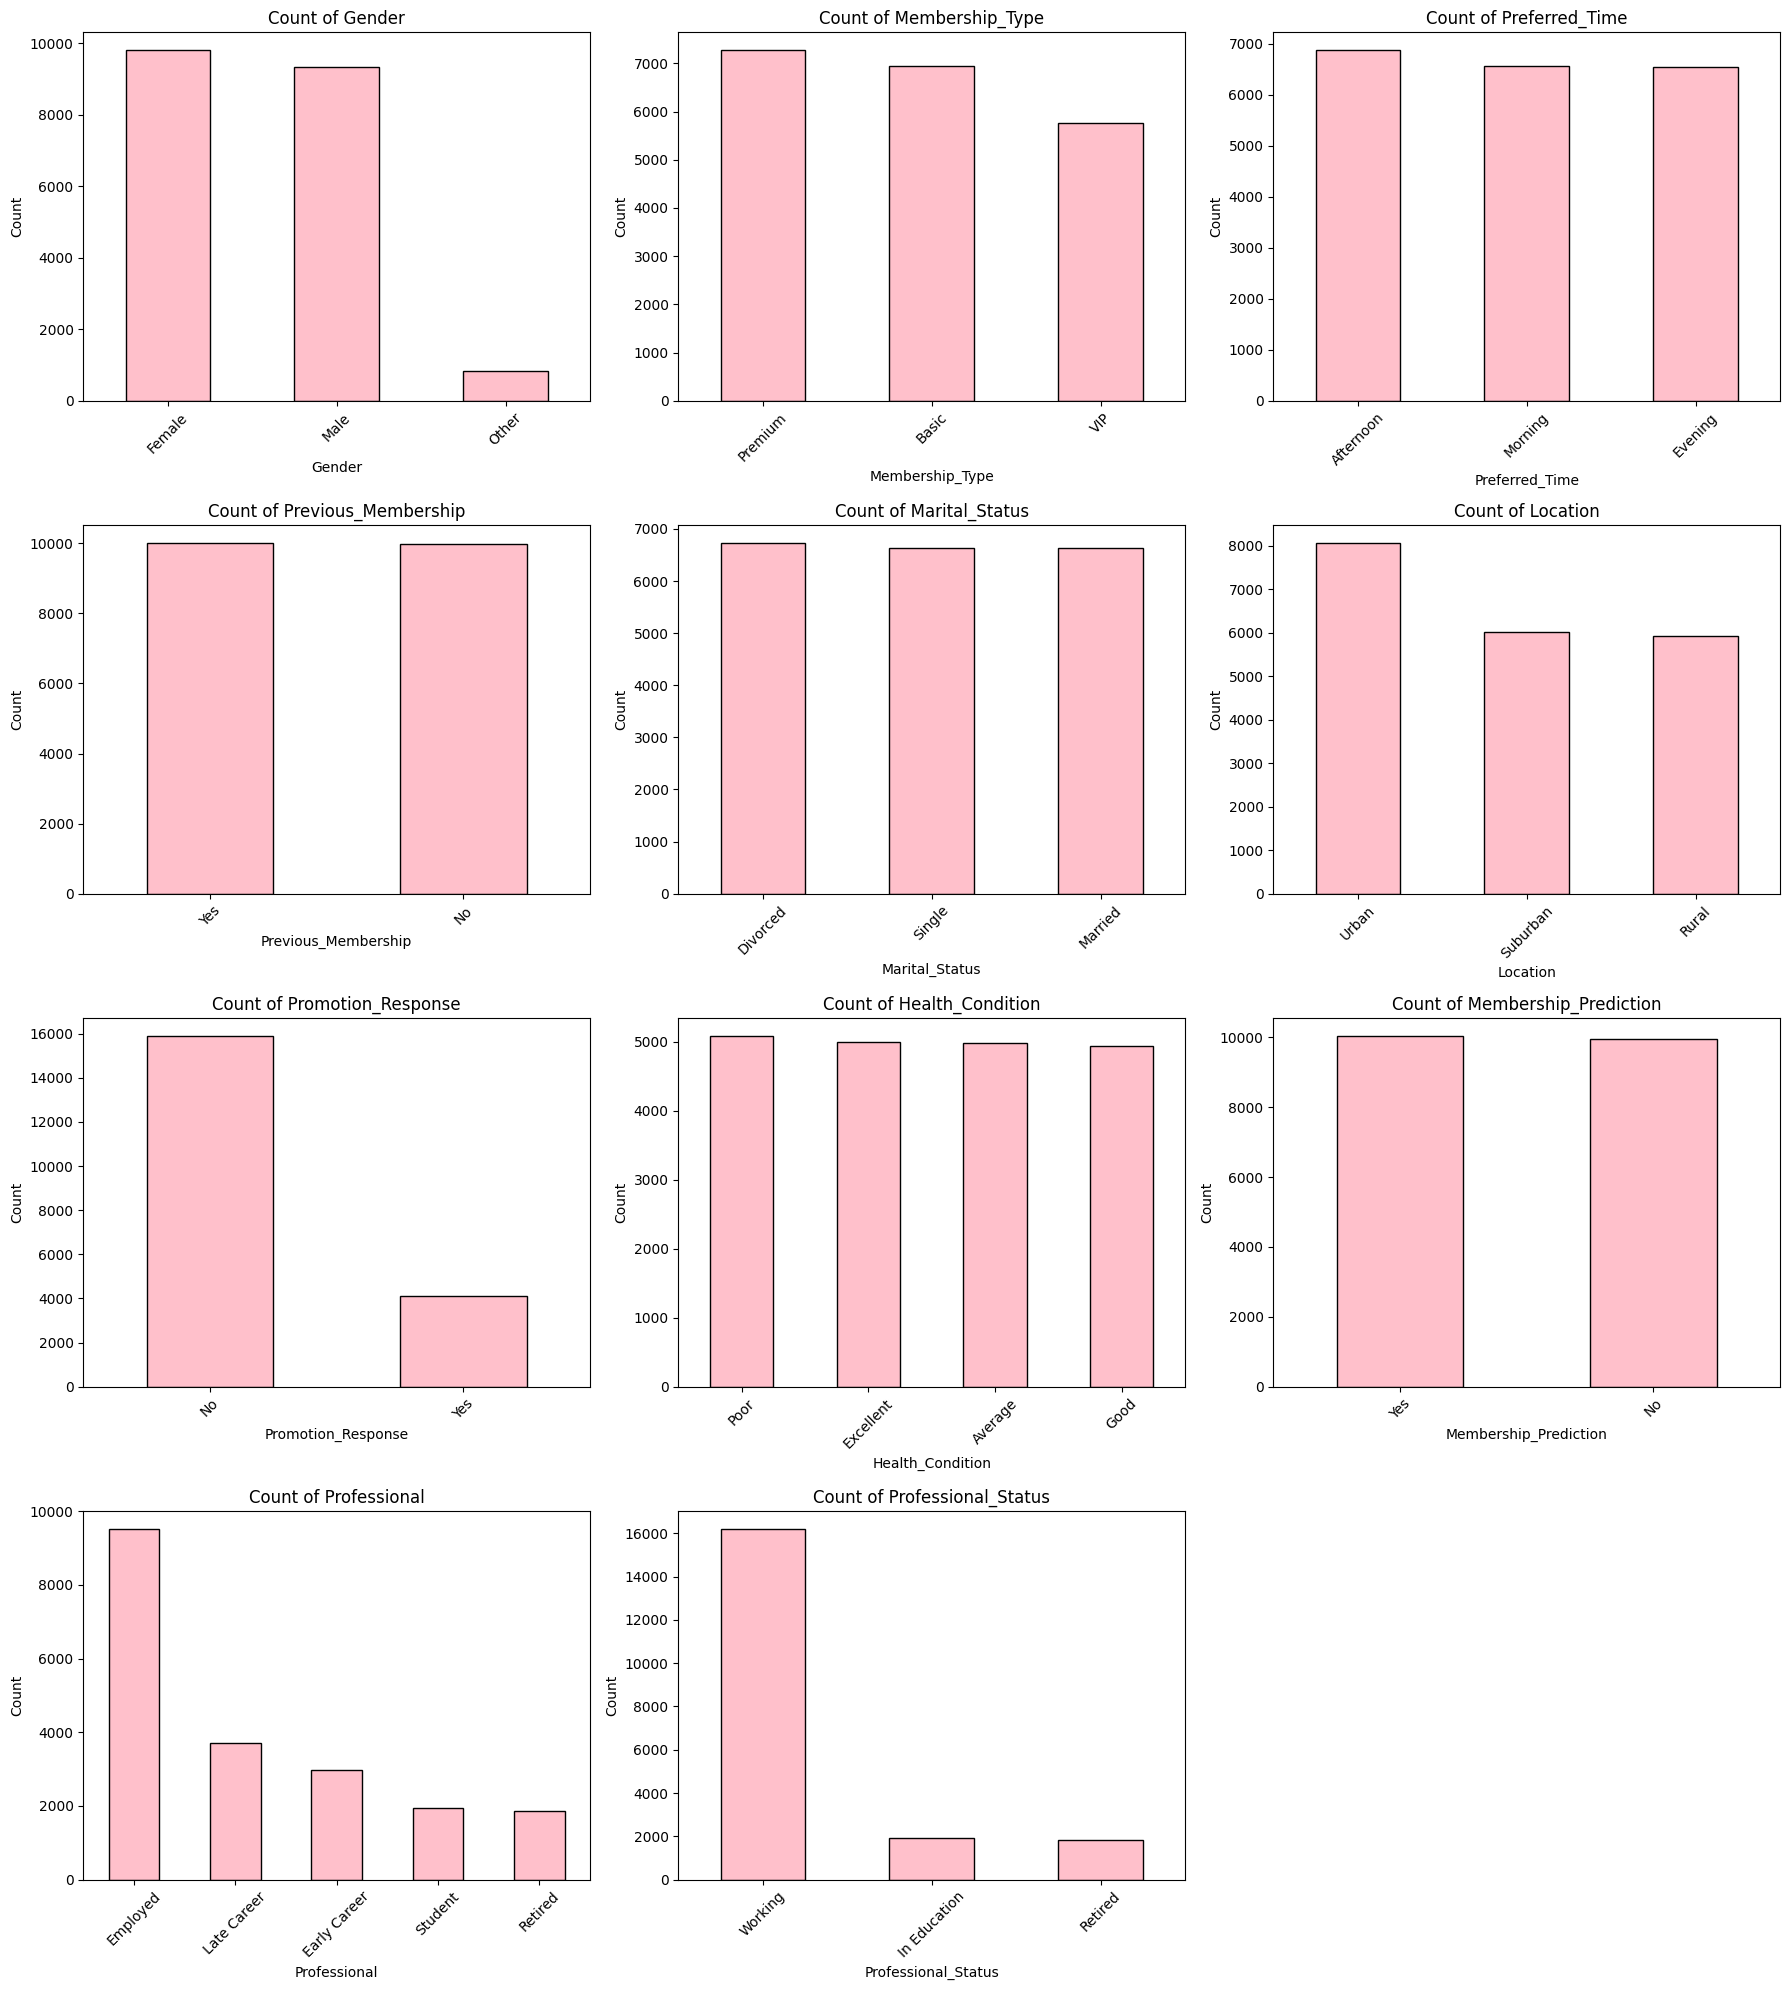

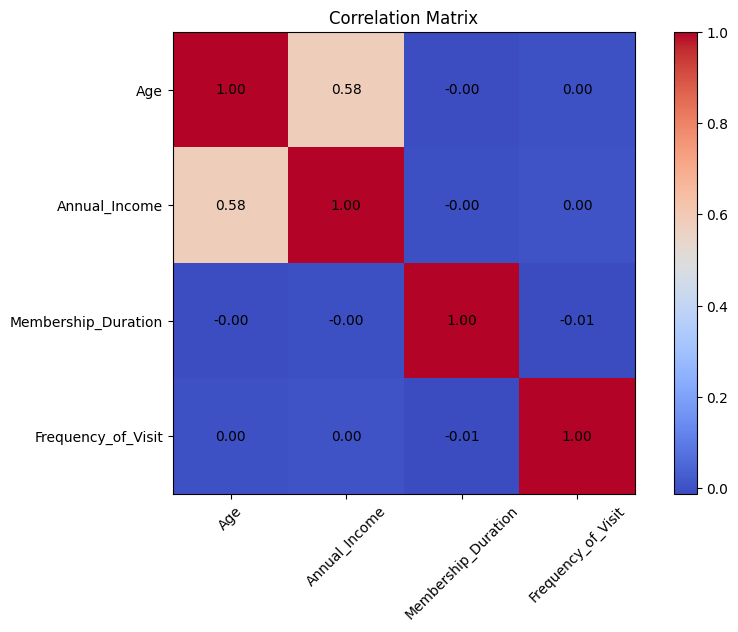

In [107]:
import matplotlib.pyplot as plt

# 1. Distribution of Numerical Variables
plt.figure(figsize=(14, 10))

numerical_cols = ['Age', 'Annual_Income', 'Membership_Duration','Frequency_of_Visit']

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[col], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Count Plots for Categorical Variables
plt.figure(figsize=(18, 20))

categorical_cols = ['Gender', 'Membership_Type', 'Preferred_Time', 'Previous_Membership', 
                    'Marital_Status', 'Location', 'Promotion_Response', 'Health_Condition', 
                    'Membership_Prediction', 'Professional', 'Professional_Status']

for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)
    df[col].value_counts().plot(kind='bar', color='pink', edgecolor='black')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Correlation Matrix for Numerical Variables
plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_cols].corr()

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
plt.yticks(range(len(numerical_cols)), numerical_cols)
plt.title('Correlation Matrix')

# Adding correlation coefficients on the heatmap
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

